In [1]:
import numpy as np
import time as Time
from numba import jit
import matplotlib.pyplot as plt
import pyvista as pv
import torch

In [2]:
T = 300
Cm = (2*1.380649e-23*T/(27*1.66e-27) )**0.5 # (2kT/m)**0.5 27 for the Al

def max_velocity_u( random1, random2):
    return Cm*np.sqrt(-np.log(random1))*(np.cos(2*np.pi*random2))

def max_velocity_w( random1, random2):
    return Cm*np.sqrt(-np.log(random1))*(np.sin(2*np.pi*random2))

def max_velocity_v( random3):
    return -Cm*np.sqrt(-np.log(random3))

In [12]:
N = int(1e6)
velosity_matrix = np.zeros((N, 3))
# tstep=1e-5
# celllength=1e-5
# velosity_matrix[:, 0] = -1 * celllength /tstep
# velosity_matrix[:, 1] = -1 * celllength /tstep
Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)
velosity_matrix = np.array([max_velocity_u(Random1, Random2), \
                            # max_velocity_w(Random1, Random2), \
                                max_velocity_v(Random3)]).T

energy = np.linalg.norm(velosity_matrix, axis=1)
velosity_matrix[:,0] = np.divide(velosity_matrix[:,0], energy)
velosity_matrix[:,1] = np.divide(velosity_matrix[:,1], energy)
# velosity_matrix[:,2] = np.divide(velosity_matrix[:,2], energy)


In [20]:
left = velosity_matrix[:,0] < 0 

(array([7.0434e+04, 2.8758e+04, 2.2082e+04, 1.8308e+04, 1.6060e+04,
        1.4482e+04, 1.3227e+04, 1.2092e+04, 1.1421e+04, 1.0520e+04,
        9.9570e+03, 9.3870e+03, 9.2500e+03, 8.6250e+03, 8.2360e+03,
        7.9240e+03, 7.5920e+03, 7.2870e+03, 6.9880e+03, 6.7260e+03,
        6.6330e+03, 6.4550e+03, 6.0650e+03, 5.8850e+03, 5.9130e+03,
        5.5000e+03, 5.4320e+03, 5.2750e+03, 5.0630e+03, 4.9690e+03,
        4.8150e+03, 4.8370e+03, 4.6770e+03, 4.3140e+03, 4.3620e+03,
        4.2360e+03, 4.0660e+03, 4.0430e+03, 3.8670e+03, 3.8060e+03,
        3.7080e+03, 3.6090e+03, 3.4930e+03, 3.3730e+03, 3.4120e+03,
        3.1920e+03, 3.1570e+03, 3.0160e+03, 3.1290e+03, 2.9360e+03,
        2.8600e+03, 2.7530e+03, 2.7740e+03, 2.6410e+03, 2.5350e+03,
        2.4920e+03, 2.4310e+03, 2.3410e+03, 2.3450e+03, 2.2070e+03,
        2.2240e+03, 2.0410e+03, 1.9550e+03, 1.9330e+03, 1.8410e+03,
        1.8170e+03, 1.7750e+03, 1.7420e+03, 1.5880e+03, 1.6180e+03,
        1.5410e+03, 1.5180e+03, 1.3810e+03, 1.40

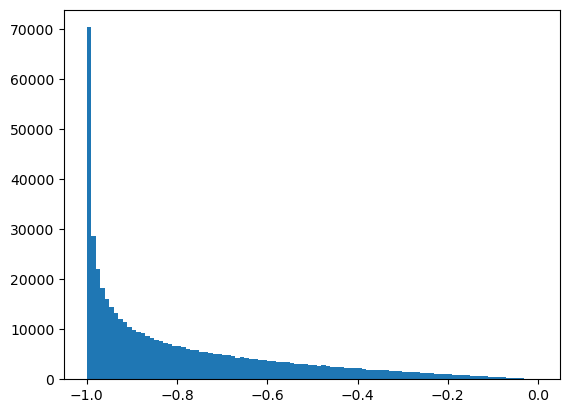

In [21]:
plt.hist(velosity_matrix[left, 1], bins=100)

(array([10002., 10011.,  9966.,  9764., 10099., 10076., 10020.,  9995.,
         9993., 10039.,  9981.,  9975.,  9930., 10126., 10015., 10062.,
         9927., 10097.,  9977., 10109.,  9877., 10029., 10004., 10000.,
        10074., 10096.,  9974.,  9977.,  9807., 10038.,  9941., 10115.,
         9941., 10054., 10022.,  9910.,  9935.,  9957.,  9923., 10045.,
         9947.,  9933., 10000.,  9961.,  9878., 10097.,  9920., 10021.,
        10027., 10017., 10049.,  9868., 10041.,  9733., 10119., 10054.,
         9810., 10001., 10005.,  9888., 10045., 10121., 10124.,  9923.,
         9901., 10062., 10025., 10120.,  9988., 10075.,  9948.,  9945.,
        10125.,  9837.,  9905., 10037., 10001., 10118., 10084., 10027.,
        10038.,  9966., 10063.,  9914., 10080.,  9813., 10053., 10222.,
        10029., 10032.,  9983.,  9873., 10071., 10062., 10005., 10182.,
        10019.,  9958., 10020.,  9954.]),
 array([-9.99999332e-01, -9.79999366e-01, -9.59999399e-01, -9.39999433e-01,
        -9.1999946

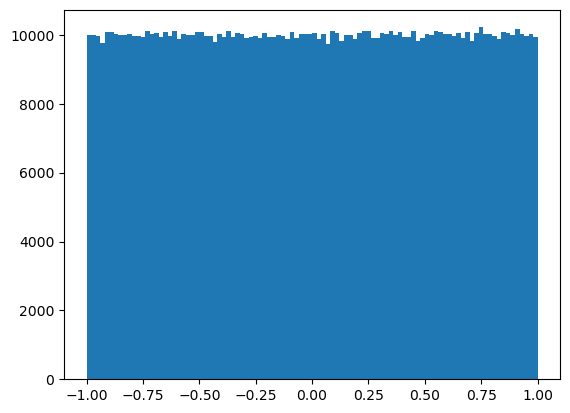

In [15]:
plt.hist(velosity_matrix[:,0], bins=100)

In [14]:
import pstats
from pstats import SortKey
p = pstats.Stats('restats')
p.strip_dirs().sort_stats(-1).print_stats()

Tue Sep 17 11:45:22 2024    restats

         5228532 function calls (4923073 primitive calls) in 1230.466 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      130    0.000    0.000    0.000    0.000 <frozen _collections_abc>:1022(__iter__)
        2    0.000    0.000    0.000    0.000 <frozen _collections_abc>:104(_check_methods)
        1    0.000    0.000    0.000    0.000 <frozen _collections_abc>:288(__subclasshook__)
       50    0.000    0.000    0.000    0.000 <frozen _collections_abc>:341(__subclasshook__)
        6    0.000    0.000    0.000    0.000 <frozen _collections_abc>:435(__subclasshook__)
     2612    0.003    0.000    0.012    0.000 <frozen _collections_abc>:811(__contains__)
       32    0.000    0.000    0.000    0.000 <frozen _collections_abc>:819(keys)
       64    0.000    0.000    0.000    0.000 <frozen _collections_abc>:823(items)
       96    0.000    0.000    0.000    0.000 <frozen _collections

In [18]:
p.strip_dirs().sort_stats(1).print_stats()

Tue Sep 17 11:45:22 2024    restats

         5228532 function calls (4923073 primitive calls) in 1230.466 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      200  358.505    1.793  358.691    1.793 Multi_Species_bosch_etching.py:198(boundary)
      200  288.643    1.443  738.756    3.694 Multi_Species_bosch_etching.py:354(getAcc_depo)
      200  178.555    0.893  310.112    1.551 Multi_Species_bosch_etching.py:253(etching_film)
 7533/511   97.509    0.013  278.540    0.545 {method 'acquire' of '_thread.lock' objects}
      200   76.791    0.384   76.880    0.384 Multi_Species_bosch_etching.py:374(Parcelgen)
     2954   69.130    0.023   69.130    0.023 {method 'astype' of 'numpy.ndarray' objects}
    25288   47.251    0.002   47.251    0.002 {method 'reduce' of 'numpy.ufunc' objects}
      499   42.462    0.085   48.126    0.096 _kdtree.py:353(__init__)
      499   18.504    0.037   20.724    0.042 _kdtree.py:363(query)


In [21]:
p = pstats.Stats('noMirror_cprofile')
p.strip_dirs().sort_stats(1).print_stats()

Tue Sep 17 17:34:13 2024    noMirror_cprofile

         5442308 function calls (5128831 primitive calls) in 612.017 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      336  156.690    0.466  471.446    1.403 Multi_Species_bosch_etching_noMirrorSymmtry.py:353(getAcc_depo)
      336  100.500    0.299  100.525    0.299 Multi_Species_bosch_etching_noMirrorSymmtry.py:195(boundary)
      336   95.432    0.284  223.051    0.664 Multi_Species_bosch_etching_noMirrorSymmtry.py:250(etching_film)
      907   63.551    0.070   71.507    0.079 _kdtree.py:353(__init__)
    42875   43.311    0.001   43.311    0.001 {method 'reduce' of 'numpy.ufunc' objects}
      337   38.365    0.114   38.423    0.114 Multi_Species_bosch_etching_noMirrorSymmtry.py:384(Parcelgen)
     4997   33.972    0.007   33.972    0.007 {method 'astype' of 'numpy.ndarray' objects}
      337   10.286    0.031   10.294    0.031 linalg.py:1499(svd)
      907    8.322  

In [20]:
p = pstats.Stats('noMirror_cprofile')
p.strip_dirs().sort_stats(1).print_stats()

Tue Sep 17 12:47:38 2024    noMirror_cprofile

         5224107 function calls (4918654 primitive calls) in 690.882 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      200  198.857    0.994  494.355    2.472 Multi_Species_bosch_etching_noMirrorSymmtry.py:356(getAcc_depo)
      200  134.396    0.672  134.433    0.672 Multi_Species_bosch_etching_noMirrorSymmtry.py:198(boundary)
      200  111.200    0.556  205.874    1.029 Multi_Species_bosch_etching_noMirrorSymmtry.py:253(etching_film)
      200   56.581    0.283   56.681    0.283 Multi_Species_bosch_etching_noMirrorSymmtry.py:388(Parcelgen)
     2553   45.829    0.018   45.829    0.018 {method 'astype' of 'numpy.ndarray' objects}
    25307   35.999    0.001   35.999    0.001 {method 'reduce' of 'numpy.ufunc' objects}
      497   32.216    0.065   36.327    0.073 _kdtree.py:353(__init__)
 7321/303   19.999    0.003   78.930    0.260 {method 'acquire' of '_thread.lock' obje

In [2]:
%load_ext line_profiler

In [2]:
film = np.zeros((100, 100, 200, 2))

bottom = 100
height = 140

density = 10

sphere = np.ones((100, 100, 200), dtype=bool)

radius = 30

center = 50
for i in range(sphere.shape[0]):
    for j in range(sphere.shape[1]):
        if np.abs(i-center)*np.abs(i-center) + np.abs(j-center)*np.abs(j-center) < radius*radius:
            sphere[i, j, bottom:height] = 0

film[sphere, 1] = density
film[:, :, height:, :] = 0
film[:, :, 0:bottom, 0] = density # bottom
film[:, :, 0:bottom, 1] = 0 # bottom
# film[:, :30, bottom:height, 1] = 10
# film[:, -30:, bottom:height, 1] = 10


In [3]:
sumFilm = np.sum(film, axis=-1)

print(sumFilm.shape)

(100, 100, 200)


In [4]:
depo1 = torch.Tensor(film[:, 50:, :, 1]!=0).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(film[:, 50:, :,0]!=0).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:62984/index.html?ui=P_0x25581e9b9b0_0&reconnect=auto" class="pyvis…

In [4]:
etchfilm = film

In [5]:
etchfilm = np.load('bosch_sf_step10.npy')

In [58]:
indice_c4 = etchfilm[:, :, :, 1] >= 10
etchfilm[indice_c4, 1] = 10

In [5]:
depo1 = torch.Tensor(etchfilm[:50, :, :, 1]!=0).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(etchfilm[:50, :, :,0]!=0).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53520/index.html?ui=P_0x24faad10740_0&reconnect=auto" class="pyvis…

In [62]:
etchfilm[50, 55, 45:]

array([[10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [ 0., 10.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,

In [6]:
import Multi_Species_bosch_etching

In [7]:
def max_velocity_u( random1, random2):
    return np.sqrt(-np.log(random1))*(np.cos(2*np.pi*random2))

def max_velocity_w( random1, random2):
    return np.sqrt(-np.log(random1))*(np.sin(2*np.pi*random2))

def max_velocity_v( random3):
    return -np.sqrt(-np.log(random3))

In [8]:
# F+ Ar+ 

N = int(5e7)
velosity_matrix = np.zeros((N, 3))
# tstep=1e-5
# celllength=1e-5
# velosity_matrix[:, 0] = -1 * celllength /tstep
# velosity_matrix[:, 1] = -1 * celllength /tstep
Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)
velosity_matrix = np.array([max_velocity_u(Random1, Random2), \
                            max_velocity_w(Random1, Random2), \
                                max_velocity_v(Random3)]).T

energy = np.linalg.norm(velosity_matrix, axis=1)
velosity_matrix[:,0] = np.divide(velosity_matrix[:,0], energy)
velosity_matrix[:,1] = np.divide(velosity_matrix[:,1], energy)
velosity_matrix[:,2] = np.divide(velosity_matrix[:,2], energy)

# velosity_matrix[:, 2] = -1 * celllength /tstep

typeID = np.zeros(N)
# FO_ratio = int(N/4)
# typeID[-FO_ratio:] = 1

# add Ar+
# ion_ration = int(N/4)
# typeID[-ion_ration:] = 2
# velosity_matrix[-ion_ration:, 0] = np.random.rand(ion_ration)*0.01 - 0.005
# velosity_matrix[-ion_ration:, 1] = np.random.rand(ion_ration)*0.01 - 0.005
# velosity_matrix[-ion_ration:, 2] = -1 
# add Ar+


vel_type_shuffle = np.zeros((N, 4))
vel_type_shuffle[:, :3] = velosity_matrix
vel_type_shuffle[:, -1] = typeID

np.random.shuffle(vel_type_shuffle)
# print(typeID[:10])
# print(velosity_matrix[0])
print(vel_type_shuffle[:10])

[[ 0.36649334  0.28849331 -0.88456443  0.        ]
 [ 0.37737369  0.43433822 -0.81788716  0.        ]
 [-0.12094158  0.82900025 -0.5460144   0.        ]
 [ 0.21663818  0.22496242 -0.94997885  0.        ]
 [ 0.59502605  0.53164865 -0.60273851  0.        ]
 [-0.56242112 -0.24855685 -0.78860762  0.        ]
 [-0.84526408 -0.19293667 -0.49830119  0.        ]
 [-0.49339127 -0.39742832 -0.77370265  0.        ]
 [-0.70866371  0.42373211 -0.56413372  0.        ]
 [-0.37752493  0.0808203  -0.92246572  0.        ]]


In [63]:
N = int(1e6)
velosity_matrix = np.zeros((N, 3))

typeID = np.zeros(N)
# FO_ratio = int(N/4)
# typeID[-FO_ratio:] = 1

ion_ration = int(N)
typeID[-ion_ration:] = 2
velosity_matrix[-ion_ration:, 0] = np.random.rand(ion_ration)*0.01 - 0.005
velosity_matrix[-ion_ration:, 1] = np.random.rand(ion_ration)*0.01 - 0.005
velosity_matrix[-ion_ration:, 2] = -1 

vel_type_shuffle = np.zeros((N, 4))
vel_type_shuffle[:, :3] = velosity_matrix
vel_type_shuffle[:, -1] = typeID

np.random.shuffle(vel_type_shuffle)
# print(typeID[:10])
# print(velosity_matrix[0])
print(vel_type_shuffle[:10])

[[ 5.40091043e-04  3.14177961e-03 -1.00000000e+00  2.00000000e+00]
 [-4.54078428e-03  2.57382055e-03 -1.00000000e+00  2.00000000e+00]
 [ 3.77557195e-03  3.94541595e-03 -1.00000000e+00  2.00000000e+00]
 [ 4.05191839e-03  1.63245413e-03 -1.00000000e+00  2.00000000e+00]
 [-2.26384230e-03 -3.41551823e-03 -1.00000000e+00  2.00000000e+00]
 [-2.50544706e-04  4.96622775e-04 -1.00000000e+00  2.00000000e+00]
 [ 2.16436864e-03  3.45842638e-03 -1.00000000e+00  2.00000000e+00]
 [ 1.74127788e-03  2.16614901e-03 -1.00000000e+00  2.00000000e+00]
 [ 2.57891242e-03 -2.19787644e-03 -1.00000000e+00  2.00000000e+00]
 [-3.60594991e-03 -2.53308143e-03 -1.00000000e+00  2.00000000e+00]]


In [14]:
print(vel_type_shuffle[10:20])

[[-3.68380774e-01  5.11607868e-01 -7.76242872e-01  0.00000000e+00]
 [-2.62083917e-01 -8.45568133e-01 -4.65109183e-01  0.00000000e+00]
 [-5.65620406e-01  3.02950370e-01 -7.67003670e-01  0.00000000e+00]
 [-6.15339422e-02 -4.23597030e-01 -9.03758336e-01  0.00000000e+00]
 [-4.84750871e-01  1.73537876e-01 -8.57263786e-01  0.00000000e+00]
 [-2.14957732e-01  5.32181143e-01 -8.18887297e-01  0.00000000e+00]
 [-3.23637043e-01 -7.59884259e-01 -5.63768550e-01  0.00000000e+00]
 [-4.28698360e-01 -1.71049598e-01 -8.87107520e-01  0.00000000e+00]
 [ 8.46669637e-04  4.75093596e-04 -1.00000000e+00  2.00000000e+00]
 [-5.71897263e-01  4.47035248e-01 -6.87817568e-01  0.00000000e+00]]


In [49]:
# c4f8

N = int(1e7)
velosity_matrix = np.zeros((N, 3))
# tstep=1e-5
# celllength=1e-5
# velosity_matrix[:, 0] = -1 * celllength /tstep
# velosity_matrix[:, 1] = -1 * celllength /tstep
Random1 = np.random.rand(N)
Random2 = np.random.rand(N)
Random3 = np.random.rand(N)
velosity_matrix = np.array([max_velocity_u(Random1, Random2), \
                            max_velocity_w(Random1, Random2), \
                                max_velocity_v(Random3)]).T

energy = np.linalg.norm(velosity_matrix, axis=1)
velosity_matrix[:,0] = np.divide(velosity_matrix[:,0], energy)
velosity_matrix[:,1] = np.divide(velosity_matrix[:,1], energy)
velosity_matrix[:,2] = np.divide(velosity_matrix[:,2], energy)

# velosity_matrix[:, 2] = -1 * celllength /tstep

typeID = np.ones(N)
# FO_ratio = int(N/4)
# typeID[-FO_ratio:] = 1

# ion_ration = int(N/8)
# typeID[-ion_ration:] = 2
# velosity_matrix[-ion_ration:, 0] = np.random.rand(ion_ration)*0.001
# velosity_matrix[-ion_ration:, 1] = np.random.rand(ion_ration)*0.001
# velosity_matrix[-ion_ration:, 2] = -1 

vel_type_shuffle = np.zeros((N, 4))
vel_type_shuffle[:, :3] = velosity_matrix
vel_type_shuffle[:, -1] = typeID

np.random.shuffle(vel_type_shuffle)
# print(typeID[:10])
# print(velosity_matrix[0])
print(vel_type_shuffle[:10])

[[-0.17839113 -0.86820551 -0.46302894  1.        ]
 [ 0.41936594  0.45306316 -0.78668036  1.        ]
 [ 0.68916596 -0.47394099 -0.54811516  1.        ]
 [-0.64269414 -0.07646823 -0.76229709  1.        ]
 [-0.76288849 -0.25496899 -0.59413127  1.        ]
 [-0.69749417  0.50898933 -0.50441228  1.        ]
 [ 0.17935686  0.28565881 -0.94139798  1.        ]
 [ 0.15481802  0.45571212 -0.87656023  1.        ]
 [ 0.5249166  -0.56691386 -0.63487891  1.        ]
 [ 0.28321522  0.69085135 -0.66521692  1.        ]]


In [9]:
#etching
logname = 'Multi_species_bosch_911'
testEtch = Multi_Species_bosch_etching.etching(mirror=True,inputMethod='bunch', depo_or_etching='etching', 
                            etchingPoint = np.array([center, center, 37]),depoPoint = np.array([center, center, 37]),
                            density=density, center_with_direction=np.array([[35,100,75]]), 
                            range3D=np.array([[0, 70, 0, 100, 0, 150]]), InOrOut=[1], yield_hist=np.array([None]),
                            reaction_type=False, param = [1.6, -0.7], N = N, 
                            sub_xy=[0,0], film=etchfilm, n=1, cellSize=etchfilm.shape, 
                            celllength=1e-5, kdtreeN=5, tstep=1e-5,
                            substrateTop=80,posGeneratorType='top', logname=logname)


# etching = testEtch.depo_position_increase_cosVel_normal(125, int(7e6), 2e-3, 5)


In [52]:
#depo
logname = 'Multi_species_bosch_911'
testEtch = Multi_Species_bosch_etching.etching(mirror=True,inputMethod='bunch', depo_or_etching='depo', 
                            etchingPoint = np.array([center, center, 45]),depoPoint = np.array([center, center, 45]),
                            density=density, center_with_direction=np.array([[35,100,75]]), 
                            range3D=np.array([[0, 70, 0, 100, 0, 150]]), InOrOut=[1], yield_hist=np.array([None]),
                            reaction_type=False, param = [1.6, -0.7], N = N, 
                            sub_xy=[0,0], film=etchfilm, n=1, cellSize=etchfilm.shape, 
                            celllength=1e-5, kdtreeN=5, tstep=1e-5,
                            substrateTop=80,posGeneratorType='top', logname=logname)

In [10]:
etching = testEtch.inputParticle(125,vel_type_shuffle[:,:3], vel_type_shuffle[:,-1], 2e-2, 5)

running: 100%|██████████████████████████████████████████████████████| 100/100 [46:48<00:00, 28.1s/B]


In [13]:
np.save('bosch_sf_step11', etchfilm)

In [47]:
etchfilm[50, 50, 60:]

array([[10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [ 0.,  6.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,

In [13]:
etchfilm[50, 50, 60:]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [43]:
etching[0][50, 50, 60:]

array([[10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [10.,  0.],
       [ 0., 10.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,

In [11]:
depo1 = torch.Tensor(etching[0][:, 50:, :, 1]!=0).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(etching[0][:, 50:, :,0]!=0).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:53520/index.html?ui=P_0x24faac80a40_1&reconnect=auto" class="pyvis…

In [66]:
depo1 = torch.Tensor(etchfilm[:50, :, :, 1]!=0).to_sparse()
depo1 = depo1.indices().numpy().T

substrute = torch.Tensor(etchfilm[:50, :, :,0]!=0).to_sparse()
substrute = substrute.indices().numpy().T
depomesh = pv.PolyData(depo1)
depomesh["radius"] = np.ones(depo1.shape[0])*0.5
geom = pv.Box()

submesh = pv.PolyData(substrute)
submesh["radius"] = np.ones(substrute.shape[0])*0.5

# Progress bar is a new feature on master branch
depoglyphed = depomesh.glyph(scale="radius", geom=geom) # progress_bar=True)
subglyphed = submesh.glyph(scale="radius", geom=geom) # progress_bar=True)

p = pv.Plotter()
p.add_mesh(depoglyphed, color='cyan')
p.add_mesh(subglyphed, color='dimgray')
p.enable_eye_dome_lighting()
p.show()

c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\utilities\points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(
c:\Users\urcs049\AppData\Local\anaconda3\Lib\site-packages\pyvista\core\filters\data_set.py:2386: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


Widget(value='<iframe src="http://localhost:63391/index.html?ui=P_0x15f92cd3020_8&reconnect=auto" class="pyvis…